In [1]:
!wget --no-check-certificate \
  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
  -O /tmp/cats_and_dogs_filtered.zip

--2020-09-16 03:46:42--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.164.144, 172.217.164.176, 172.217.13.80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.164.144|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   223MB/s    in 0.3s    

2020-09-16 03:46:43 (223 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [2]:
import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('/tmp')
zip_ref.close()

In [3]:
from pathlib import Path

In [4]:
base_dir = Path('/tmp/cats_and_dogs_filtered')
train_dir = base_dir / Path('train')
validation_dir = base_dir / Path('validation')

In [5]:
train_cats_dir = train_dir / Path('cats')
train_dogs_dir = train_dir / Path('dogs')

In [6]:
validation_cats_dir = validation_dir / Path('cats')
validation_dogs_dir = validation_dir / Path('dogs')

In [7]:
train_cat_fnames = os.listdir(train_cats_dir)
train_dog_fnames = os.listdir(train_dogs_dir)

In [8]:
print(train_cat_fnames[:10])
print(train_dog_fnames[:10])

['cat.127.jpg', 'cat.126.jpg', 'cat.125.jpg', 'cat.124.jpg', 'cat.123.jpg', 'cat.122.jpg', 'cat.121.jpg', 'cat.120.jpg', 'cat.119.jpg', 'cat.118.jpg']
['dog.127.jpg', 'dog.126.jpg', 'dog.125.jpg', 'dog.124.jpg', 'dog.123.jpg', 'dog.122.jpg', 'dog.121.jpg', 'dog.120.jpg', 'dog.119.jpg', 'dog.118.jpg']


In [9]:
print('Total training cat images:', len(os.listdir(train_cats_dir)))
print('Total training dog images:', len(os.listdir(train_dogs_dir)))

Total training cat images: 1000
Total training dog images: 1000


In [10]:
print('Total validation cat images:', len(os.listdir(validation_cats_dir)))
print('Total validation dog images:', len(os.listdir(validation_dogs_dir)))

Total validation cat images: 500
Total validation dog images: 500


In [11]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# graph parameters
n_rows = 4
n_columns = 4

pic_index = 0

In [12]:
import tensorflow as tf

In [13]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3), activation='relu', input_shape=(150,150,3)),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    # flatten to feed into DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

In [15]:
from tensorflow.keras.optimizers import RMSprop

In [16]:
model.compile(optimizer=RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [18]:
train_datagen = ImageDataGenerator( rescale=1.0/255.)
validation_datagen = ImageDataGenerator( rescale=1.0/255.)

In [19]:
# Flow images in batches of 20 using datagen generator

train_generator = train_datagen.flow_from_directory(train_dir, batch_size=20, class_mode='binary',target_size=(150,150))
validation_generator = validation_datagen.flow_from_directory(validation_dir, batch_size=20, class_mode='binary',target_size=(150,150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [20]:
history = model.fit(train_generator, validation_data=validation_generator, steps_per_epoch=100, epochs=15, validation_steps=50, verbose=2)

Epoch 1/15
100/100 - 5s - loss: 0.7593 - accuracy: 0.5680 - val_loss: 0.6353 - val_accuracy: 0.6460
Epoch 2/15
100/100 - 5s - loss: 0.6205 - accuracy: 0.6700 - val_loss: 0.6554 - val_accuracy: 0.6480
Epoch 3/15
100/100 - 5s - loss: 0.5246 - accuracy: 0.7445 - val_loss: 0.5706 - val_accuracy: 0.7090
Epoch 4/15
100/100 - 5s - loss: 0.4430 - accuracy: 0.7935 - val_loss: 0.5744 - val_accuracy: 0.7250
Epoch 5/15
100/100 - 5s - loss: 0.3414 - accuracy: 0.8505 - val_loss: 0.7773 - val_accuracy: 0.6960
Epoch 6/15
100/100 - 5s - loss: 0.2596 - accuracy: 0.8995 - val_loss: 0.9021 - val_accuracy: 0.6810
Epoch 7/15
100/100 - 5s - loss: 0.1947 - accuracy: 0.9255 - val_loss: 0.9650 - val_accuracy: 0.6990
Epoch 8/15
100/100 - 5s - loss: 0.1404 - accuracy: 0.9485 - val_loss: 0.9772 - val_accuracy: 0.6740
Epoch 9/15
100/100 - 5s - loss: 0.0872 - accuracy: 0.9700 - val_loss: 1.3393 - val_accuracy: 0.7000
Epoch 10/15
100/100 - 5s - loss: 0.0784 - accuracy: 0.9770 - val_loss: 1.2079 - val_accuracy: 0.7140

In [21]:
import numpy as np
from tensorflow.keras.preprocessing import image

In [29]:
img = image.load_img(tf.keras.utils.get_file('test_file','https://i.insider.com/5ef54cb61918242cfb4ec653?width=1100&format=jpeg&auto=webp'), target_size=(150,150))

In [30]:
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

In [31]:
images = np.vstack([x])

In [32]:
classes = model.predict(images)

In [35]:
if classes[0]==1:
    print('dog')
else:
    print('cat')

dog


In [36]:
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

In [37]:
successive_outputs = [layer.output for layer in model.layers[1:]]

In [38]:
visualization_model = tf.keras.models.Model(inputs=model.input, outputs = successive_outputs)

In [39]:
cat_img_files = [Path(train_cats_dir)/Path(f) for f in train_cat_fnames]
dog_img_files = [Path(train_dogs_dir)/Path(f) for f in train_dog_fnames]

In [40]:
img_path = random.choice(cat_img_files + dog_img_files)
img = load_img(img_path, target_size=(150,150))

In [41]:
x = img_to_array(img)
x = x.reshape((1,)+x.shape)

In [42]:
x = x/255.0

In [43]:
successive_feature_maps = visualization_model.predict(x)
layer_names = [layer.name for layer in model.layers]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


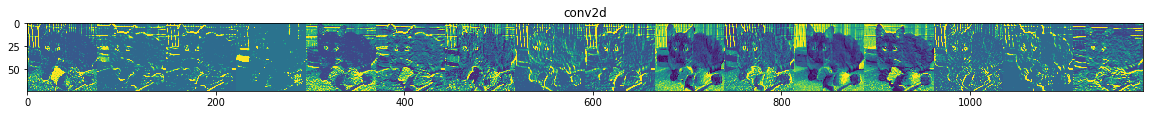

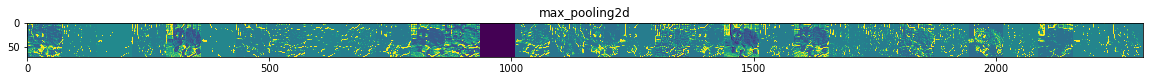

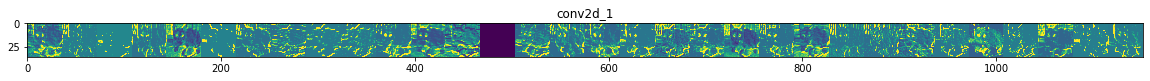

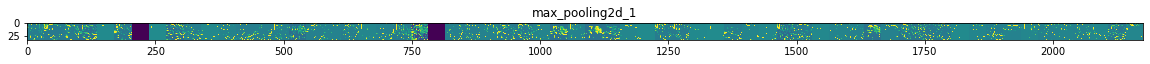

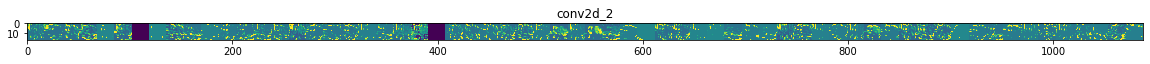

In [47]:
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
    if len(feature_map.shape) == 4:
        n_features = feature_map.shape[-1]
        size = feature_map.shape[1]
        
        display_grid = np.zeros((size, size * n_features))
        
        for i in range(n_features):
            x = feature_map[0, :, :, i]
            x -= x.mean()
            x /= x.std()
            x *= 64
            x += 128
            x = np.clip(x, 0, 255).astype('uint8')
            display_grid[:, i*size : (i+1)*size] = x
        
        scale = 20. / n_features
        plt.figure(figsize=(scale*n_features, scale))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto',cmap='viridis')